### 1. if the season of empareamiento has something to do with the same time of the shark attacks.

### Is there some reason why the sharks go closer to the shores in some specific season or reason or .....

### Is there an specific time that sharks likes to go close to the shore?

### where does the most fatal accidents occure

# 1. Hypotesis ganadora: 
## Does sharks attack more because they are horny? 
### Que necesito de informacion para esta hypotesis?????

#### datos de la tabla para  limpiar    
    1. Necesito los tiempos, las fechas en que ocurrio el ataque 
    2. La especie de sharks.
    3. el estado del ataque, si fue fatal o no (posiblemente mientras mas fuerte el ataque, mas caliente)

#### Tipo de analisis
    1. relacionar el tipo de especie con las fechas del ataque - a ver si hay una corelacion, similitudes de mismas especies con el tiempo del ataque
    2.relacionar si coinciden tambien los ataques mas mortales con las fechas del ataque.

#### Investigar por fuera:
    1. cuales son las temporadas de mating de los difierentes tipos de sharks pueestos en el df
    2. podemos investigar si hay alguna relacion del clima que prefieren los tiburones para el tiempo de apareamiento.
    3. investigar junto con el DF el clima de los lugares al momento del ataque.

como limpiar las celdas cuando no son ... 

In [6]:
import pandas as pd
import numpy as np
import openpyxl
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
csv_file = "D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\clean_attack.csv"
shark_clean = pd.read_csv(csv_file, encoding='utf8')

In [15]:
shark_clean.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
4514,4514,1949.0,Provoked,AUSTRALIA,Queensland,"Nerang River, Southpot",Fishing,"""Lockie"" Smith",M,NaN,Toe bitten by netted shark PROVOKED INCIDENT,N,NaN,Apr,NaN


In [71]:
csv_file = "D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\clean_attack2.csv"
shark_cleanned = pd.read_csv(csv_file, encoding='utf8')

In [72]:
shark_cleanned.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
5107,5107,1928.0,Unprovoked,JAMAICA,NaN,"Coal wharf, Port Royal",Diving,Lewis,M,NaN,FATAL,Y,Evening,Apr,NaN


Detecting information co related between the attacks of each species during specific time.

How to sort the values by month 

In [83]:
months = {"Jan":1, "Feb":2, "Mar":3, "Oct":10, "Sep":9, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Nov":11, "Dec":12}

In [84]:
shark_clean.sort_values("Months", key = lambda x :x.apply(lambda x : months[x]))

KeyError: nan

In [76]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
shark_cleanned['Months'] = pd.Categorical(shark_cleanned['Months'], categories=months, ordered=True)
shark_cleanned.sort_values(by='Months',inplace=True)

In [78]:
shark_cleanned.sample(50)

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
4608,4608,1946.0,Unprovoked,AUSTRALIA,Queensland,Townsville,NaN,Donald Vaughan,M,12,Ankle bitten,N,NaN,Jan,NaN
5055,5055,1930.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"North End Beach, Port Elizabeth",Swimming,Mr. Meyer,M,NaN,FATAL,Y,NaN,NaN,NaN
18,18,2018.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,male,M,30,"No injury, shark bit scuba gear",N,10h40,Apr,tigershark
6103,6103,1826.0,Sea Disaster,CUBA,NaN,NaN,HBM Magpie foundered in a squall,Lieutenant Edward Smith,M,NaN,FATAL,Y,NaN,Aug,NaN
4025,4025,1960.0,Unprovoked,GRENADA,St. Georges,Black Point Bay,Spearfishing,Julian Bain,M,9,Toe bitten,N,NaN,NaN,NaN
804,804,2012.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Joey Coppola,M,21,Minor lacerations to foot,N,14h00,Mar,NaN
5968,5968,1862.0,Unprovoked,SPAIN,Malaga,San Andres Beach,Swimming,Joaquin Rosales Martinez,M,18,FATAL,Y,NaN,Jul,NaN
2934,2934,1983.0,Unprovoked,USA,Florida,"Off 12th Street, Miami Beach",Swimming,Howard Rosen,M,42,Left foot bitten,N,11h00,Jun,NaN
3014,3014,1981.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Stephen Drosdick,M,15,Laceration to left ankle,N,NaN,Aug,NaN
1455,1455,2006.0,Unprovoked,USA,Texas,"Sargent Beach, Matagorda County",Surf fishing,R.K. Halbert,M,NaN,Right foot bitten,N,NaN,Jul,bullshark


In [68]:
shark_clean.sort_value(by=["Months"], inplace = True)
shark_clean.sample(50)

C:\Users\ima_n\AppData\Local\Temp\ipykernel_21608\1340010249.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  shark_clean.sort_index(["Months"], inplace = True)


TypeError: unhashable type: 'list'

In [61]:
Comparation = pd.crosstab(shark_clean["Species"], shark_clean["Months"])
Comparation

Months,Apr,Aug,Dec,Jan,Jul,Jun,May,Nov,Oct,Sep
Species,,,,,,,,,,
blacktipshark,0,4,0,3,2,3,4,2,5,1
blueshark,2,3,0,0,7,3,0,0,0,4
bullshark,14,12,8,14,6,17,8,3,3,7
galapagosshark,0,0,0,0,0,0,2,1,0,0
nurseshark,0,1,3,0,7,2,2,0,1,4
porbeagleshark,0,1,0,0,1,1,0,0,1,0
reefshark,2,1,0,1,2,0,0,1,1,0
spinnershark,0,1,0,0,0,0,0,1,3,1
tigershark,14,9,17,12,6,9,10,14,13,11


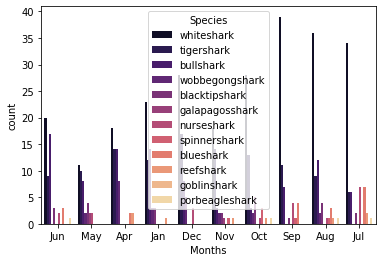

In [24]:
sns.countplot(x=shark_clean["Months"], hue=shark_clean["Species"], palette="magma");

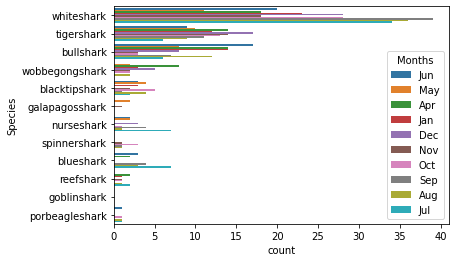

In [25]:
sns.countplot(y=shark_clean.Species, hue=shark_clean.Months);

In [26]:
shark_clean.Species.value_counts()

whiteshark        316
tigershark        159
bullshark         116
wobbegongshark     36
blacktipshark      30
nurseshark         28
blueshark          26
spinnershark       13
reefshark          11
galapagosshark      6
porbeagleshark      4
goblinshark         2
Name: Species, dtype: int64

In [29]:
shark_clean[(shark_clean.Species=="whiteshark")]

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
0,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Jun,whiteshark
22,22,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,NaN,"No injury, shark struck his leg",N,Afternoon,Apr,whiteshark
24,24,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,"No injury, shark bit hole in ski",N,09h40,Apr,whiteshark
34,34,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,Apr,whiteshark
40,40,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"19h00, Dusk",NaN,whiteshark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,6007,1853.0,Unprovoked,USA,North Carolina,"Morehead, Carteret County",Commercial Salvage Diving,Alfetto,M,NaN,No injury. Copper breastplate & harness bitten,N,NaN,NaN,whiteshark
6011,6011,1853.0,Unprovoked,USA,North Carolina,"Morehead, Carteret County",Hard hat diving,Mark Dare,M,NaN,"No injury, copper breastplate punctured",N,NaN,NaN,whiteshark
6162,6162,1700.0,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,NaN,Leg severed,N,NaN,NaN,whiteshark
6244,6244,0.0,Unprovoked,BAHAMAS,Andros Islands,NaN,NaN,"male, a sponge Diver",M,NaN,Lower leg and forearm severed,N,NaN,NaN,whiteshark


In [ ]:
sns.relplot(shark_clean=flights, x="year", y="passengers", hue="month", kind="line")

<AxesSubplot: xlabel='Months', ylabel='Count'>

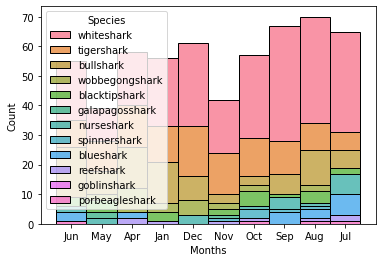

In [32]:
sns.histplot(data=shark_clean, x= "Months", hue="Species", multiple="stack")

<AxesSubplot: xlabel='Months', ylabel='Species'>

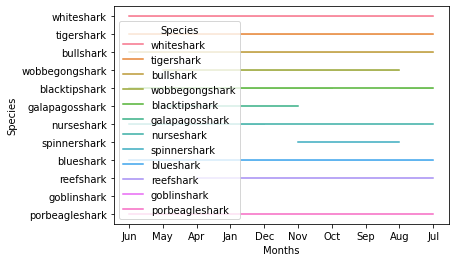

In [42]:
sns.lineplot(data=shark_clean, x="Months", y="Species", hue="Species");

### White shark

In [74]:
white = shark_cleanned[(shark_cleanned.Species=="whiteshark") & (shark_cleanned.Months)]


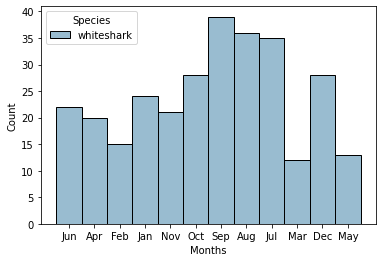

In [75]:
sns.histplot(palette="mako", x=white.Months, hue=white.Species);

In [63]:
shark_clean["Months"].value_counts()

Jul    587
Aug    548
Sep    490
Jan    462
Jun    438
Apr    408
Oct    401
Dec    389
Nov    370
May    358
Name: Months, dtype: int64

### Tiger sharks

In [52]:
tiger = shark_clean[(shark_clean.Species=="tigershark") & (shark_clean.Months)]
tiger.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
597,597,2013.0,Unprovoked,AUSTRALIA,New South Wales,"Riecks Point, Campbell’s Beach,",Body boarding,Zac Young,M,19,FATAL,Y,14h00,Nov,tigershark


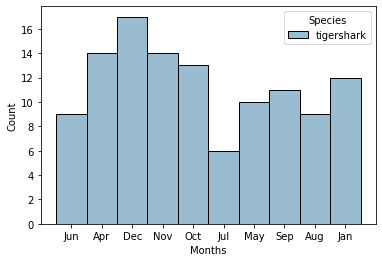

In [51]:
sns.histplot(palette="mako", x = tiger.Months, hue = tiger.Species);

### Bull sharks

In [53]:
bull = shark_clean[(shark_clean.Species=="bullshark") & (shark_clean.Months)]
bull.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
501,501,2014.0,Unprovoked,USA,Alabama,"Katrina Cut, Dauphin Island, Mobile County",Fishing,Jamie Robson,M,43,Leg bitten,N,13h00,Sep,bullshark


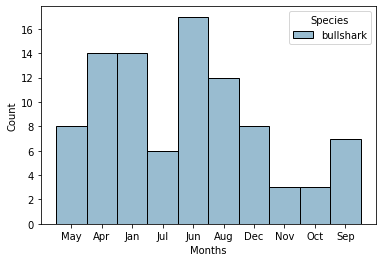

In [54]:
sns.histplot(palette="mako", x = bull.Months, hue = bull.Species);

### Wobbegong shark

In [55]:
wobbe = shark_clean[(shark_clean.Species=="wobbegongshark") & (shark_clean.Months)]
wobbe.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
3721,3721,1963.0,Provoked,AUSTRALIA,New South Wales,"Woolgoolga, Coffs Harbour",Fishing,Leslie Cook,M,NaN,7 puncture wounds in right forearm from hooked...,N,NaN,Dec,wobbegongshark


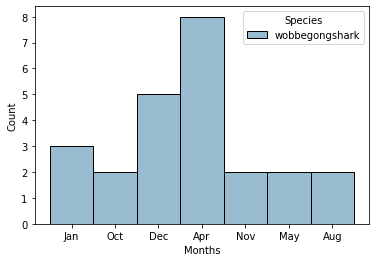

In [56]:
sns.histplot(palette="mako", x = wobbe.Months, hue = wobbe.Species);

### blacktip shark      


### Nurse shark         



### Blue shark          


### Spinner shark

### Generales 
Comparacion entre especies

In [ ]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))

# For each plot, plot it somwhere
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=axs[1])
sns.histplot(palette="mako", x=pens.flipper_length_mm, hue=pens.species, ax=axs[2])